In [1]:
import sys
sys.version

'3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]'

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [12]:
import tensorflow as tf
import time
import warnings
warnings.filterwarnings('ignore')

tf.random.set_seed(42)
A = tf.random.normal([10000,10000])
B = tf.random.normal([10000,10000])

def check():
    start_time = time.time()
    tf.reduce_sum(tf.matmul(A,B))
    print(f"It took {time.time() - start_time:.2f} seconds")

check()

It took 11.488176584243774 seconds


(60000, 28, 28)
(10000, 28, 28)


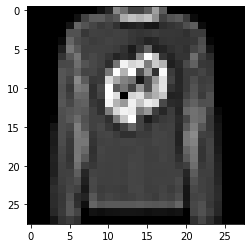

Output : Pullover
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 1568)              1230880   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                15690     
Total params: 1,246,570
Trainable params: 1,246,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4729 - accuracy: 0.8307
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3561 - accuracy: 0.8694
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3199 - accuracy: 0.8816
Epoch 4/10
1875/1875 [========================

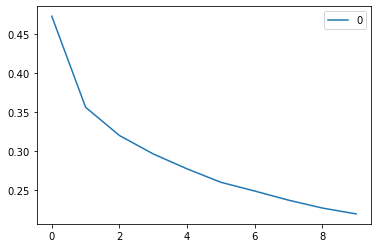

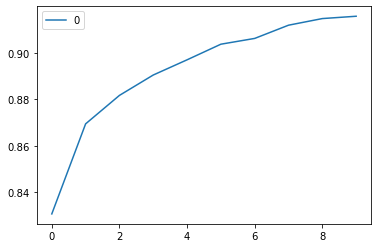

In [3]:
%%time
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Print train data and test data shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

# Print the label of the first image from the training dataset
label_index = y_train[0]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

# Reshape the dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split training data into train / validation sets (5000 validation / keep remaining 55,000 for training)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# CNN is build with help of Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# Define the model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint

# Training of the model
checkpointer = ModelCheckpoint(filepath='model_best_weights.hdf5', verbose = 1, save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=3,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])


# Load the weights with the best validation accuracy
model.load_weights('model_best_weights.hdf5')

# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

# Plot Confusion matrix
from sklearn.metrics import confusion_matrix
#import seaborn as sn

# Get the predictions from the model
y_pred_softmax = model.predict(x_test)
y_pred = np.int32([np.argmax(r) for r in y_pred_softmax])
y_test = np.int32([np.argmax(r) for r in y_test])

# Plot Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm / cm.sum(axis=1)
print(cm)

print(f"It took {time.time() - start_time:.2f} seconds")